In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns=None

In [3]:
data = pd.read_csv('2015_16_Districtwise.csv')
data.head()

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,SCH3P,SCH4P,SCH5P,SCH6P,SCH7P,SCH9P,SCHTOTP,SCH1M,SCH2M,SCH3M,SCH4M,SCH5M,SCH6M,SCH7M,SCH9M,SCHTOTM,SCH1GR,SCH2GR,SCH3GR,SCH4GR,SCH5GR,SCH6GR,SCH7GR,SCH9GR,SCHTOTGR,SCH1GA,SCH2GA,SCH3GA,SCH4GA,SCH5GA,SCH6GA,SCH7GA,SCH9GA,SCHTOTGA,SCH1PR,SCH2PR,SCH3PR,SCH4PR,SCH5PR,SCH6PR,SCH7PR,SCH9PR,SCHTOTPR,SCHBOY1,SCHBOY2,SCHBOY3,SCHBOY4,SCHBOY5,SCHBOY6,SCHBOY7,SCHBOY9,SCHBOYTOT,SCHGIR1,SCHGIR2,SCHGIR3,SCHGIR4,SCHGIR5,SCHGIR6,SCHGIR7,SCHGIR9,SCHGIRTOT,ENR1,ENR2,ENR3,ENR4,ENR5,ENR6,ENR7,ENR9,ENRTOT,ENR1G,ENR2G,ENR3G,ENR4G,ENR5G,ENR6G,ENR7G,ENR9G,ENRTOTG,ENR1P,ENR2P,ENR3P,ENR4P,ENR5P,ENR6P,ENR7P,ENR9P,ENRTOTP,ENR1M,ENR2M,ENR3M,ENR4M,ENR5M,ENR6M,ENR7M,ENR9M,ENRTOTM,ENR1GR,ENR2GR,ENR3GR,ENR4GR,ENR5GR,ENR6GR,ENR7GR,ENR9GR,ENRTOTGR,ENR1PR,ENR2PR,ENR3PR,ENR4PR,ENR5PR,ENR6PR,ENR7PR,ENR9PR,ENRTOTPR,TCH1G,TCH2G,TCH3G,TCH4G,TCH5G,TCH6G,TCH7G,TCH9G,TCHTOTG,TCH1P,TCH2P,TCH3P,TCH4P,TCH5P,TCH6P,TCH7P,TCH9P,TCHTOTP,TCH1M,TCH2M,TCH3M,TCH4M,TCH5M,TCH6M,TCH7M,TCH9M,TCHTOTM,SCLS1,SCLS2,SCLS3,SCLS4,SCLS5,SCLS6,SCLS7,SCLSTOT,STCH1,STCH2,STCH3,STCH4,STCH5,STCH6,STCH7,STCHTOT,ROAD1,ROAD2,ROAD3,ROAD4,ROAD5,ROAD6,ROAD7,ROADTOT,SPLAY1,SPLAY2,SPLAY3,SPLAY4,SPLAY5,SPLAY6,SPLAY7,SPLAYTOT,SBNDR1,SBNDR2,SBNDR3,SBNDR4,SBNDR5,SBNDR6,SBNDR7,SBNDRTOT,SGTOIL1,SGTOIL2,SGTOIL3,SGTOIL4,SGTOIL5,SGTOIL6,SGTOIL7,SGTOILTOT,SBTOIL1,SBTOIL2,SBTOIL3,SBTOIL4,SBTOIL5,SBTOIL6,SBTOIL7,SBTOILTOT,SWAT1,SWAT2,SWAT3,SWAT4,SWAT5,SWAT6,SWAT7,SWATTOT,SELE1,SELE2,SELE3,SELE4,SELE5,SELE6,SELE7,SELETOT,SCOMP1,SCOMP2,SCOMP3,SCOMP4,SCOMP5,SCOMP6,SCOMP7,SCOMPTOT,SRAM1,SRAM2,SRAM3,SRAM4,SRAM5,SRAM6,SRAM7,SRAMTOT,SRAMN1,SRAMN2,SRAMN3,SRAMN4,SRAMN5,SRAMN6,SRAMN7,SRAMNTOT,ESTD1,ESTD2,ESTD3,ESTD4,ESTD5,ESTD6,ESTD7,ESTDTOT,MDM1,MDM2,MDM3,MDM4,MDM5,MDM6,MDM7,MDMTOT,KIT1,KIT2,KIT3,KIT4,KIT5,KIT6,KIT7,KITTOT,KITS1,KITS2,KITS3,KITS4,KITS5,KITS6,KITS7,KITSTOT,ENR501,ENR502,ENR503,ENR504,ENR505,ENR506,ENR507,ENR509,ENR50TOT,SMC1,SMC2,SMC3,SMC4,SMC5,SMC6,SMC7,SMCTOT,CLS1,CLS2,CLS3,CLS4,CLS5,CLS6,CLS7,CLSTOT,TCH1,TCH2,TCH3,TCH4,TCH5,TCH6,TCH7,TCHTOT,TCHF1,TCHF2,TCHF3,TCHF4,TCHF5,TCHF6,TCHF7,TCHFTOT,TCHM1,TCHM2,TCHM3,TCHM4,TCHM5,TCHM6,TCHM7,TCHM9,ENRG1,ENRG2,ENRG3,ENRG4,ENRG5,ENRG6,ENRG7,ENRGTOT,PREP,PRESTD,PPFTCH,PPMTCH,PMTCH,PFTCH,TCHSCM1,TCHSCM2,TCHSCM3,TCHSCM4,TCHSCM5,TCHSCM6,TCHSCM7,TCHSCF1,TCHSCF2,TCHSCF3,TCHSCF4,TCHSCF5,TCHSCF6,TCHSCF7,TCHSTM1,TCHSTM2,TCHSTM3,TCHSTM4,TCHSTM5,TCHSTM6,TCHSTM7,TCHSTF1,TCHSTF2,TCHSTF3,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,C3_BR,C4_BR,C5_BR,C6_BR,C7_BR,C8_BR,C9_BR,C1_GR,C2_GR,C3_GR,C4_GR,C5_GR,C6_GR,C7_GR,C8_GR,C9_GR,SCPTOT,SCPTOT_G,SCUTOT,SCUTOT_G,STPTOT,STPTOT_G,STUTOT,STUTOT_G,OBPTOT,OBUTOT,OBPTOT_G,OBUTOT_G,MUPTOT,MUUTOT,MUPTOT_G,MUUTOT_G,BLC1,LVC1,HEC1,SPC1,LOC1,MEC1,LEC1,CPC1,AUC1,MUC1,BLC2,LVC2,HEC2,SPC2,LOC2,MEC2,LEC2,CPC2,AUC2,MUC2,BLC3,LVC3,HEC3,SPC3,LOC3,MEC3,LEC3,CPC3,AUC3,MUC3,BLC4,LVC4,HEC4,SPC4,LOC4,MEC4,LEC4,CPC4,AUC4,MUC4,BLC5,LVC5,HEC5,SPC5,LOC5,MEC5,LEC5,CPC5,AUC5,MUC5,BLC6,LVC6,HEC6,SPC6,LOC6,MEC6,LEC6,CPC6,AUC6,MUC6,BLC7,LVC7,HEC7,SPC7,LOC7,MEC7,LEC7,CPC7,AUC7,MUC7,BLC8,LVC8,HEC8,SPC8,LOC8,MEC8,LEC8,CPC8,AUC8,MUC8,TOTCLGD1G,TOTCLGD2G,TOTCLGD3G,TOTCLGD4G,TOTCLGD5G,TOTCLGD6G,TOTCLGD7G,TOTCLMI1G,TOTCLMI2G,TO

In [4]:
data.shape

(680, 819)

In [5]:
meta = pd.read_csv('Districtwise-Selected-features.csv')
meta.head()

,Field Name,Description
0,STATCD,Data_Reported_from: State code
1,DISTCD,Data_Reported_from: District Code
2,STATNAME,Data_Reported_from: State name
3,DISTNAME,Data_Reported_from: District name
4,DISTRICTS,Data_Reported_from: No. of district


In [6]:
cols = meta['Field Name'].values
cols

array(['STATCD', 'DISTCD', 'STATNAME', 'DISTNAME', 'DISTRICTS', 'BLOCKS',
       'VILLAGES', 'CLUSTERS', 'TOTPOPULAT', 'P_URB_POP',
       'POPULATION_0_6', 'GROWTHRATE', 'SEXRATIO', 'OVERALL_LI',
       'FEMALE_LIT', 'MALE_LIT', 'TOT_6_10_15', 'TOT_11_13_15', 'SCHTOT',
       'SCHTOTG', 'SCHTOTP', 'SCHTOTM', 'SCHTOTGR', 'SCHTOTGA',
       'SCHTOTPR', 'SCHBOYTOT', 'SCHGIRTOT', 'ENRTOT', 'ENRTOTG',
       'ENRTOTP', 'ENRTOTM', 'ENRTOTGR', 'ENRTOTPR', 'TCHTOTG', 'TCHTOTP',
       'TCHTOTM', 'SPLAYTOT', 'SGTOILTOT', 'SBTOILTOT', 'SWATTOT',
       'SELETOT', 'SCOMPTOT', 'SRAMTOT', 'SRAMNTOT', 'MDMTOT', 'ENR50TOT',
       'SMCTOT', 'CLSTOT', 'TCHTOT', 'ENRGTOT', 'PPFTCH', 'PPMTCH',
       'PMTCH', 'PFTCH', 'PGRMTCH', 'PGRFTCH', 'GRMTCH', 'GRFTCH',
       'PGCMTCH', 'PGCFTCH', 'PCMTCH', 'PCFTCH', 'TLME', 'TLMR', 'CONTIE',
       'CONTIR', 'PPTR30', 'UPTR35', 'PSCR30', 'USCR35', 'PTXT_ALL',
       'PUNI_ALL', 'UTXT_ALL', 'UUNI_ALL', 'TOTCLGD1G', 'TOTCLGD2G',
       'TOTCLGD3G', 'TOTCLGD4G', '

In [7]:
data = data[cols]
data.head()

,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,OVERALL_LI,FEMALE_LIT,MALE_LIT,TOT_6_10_15,TOT_11_13_15,SCHTOT,SCHTOTG,SCHTOTP,SCHTOTM,SCHTOTGR,SCHTOTGA,SCHTOTPR,SCHBOYTOT,SCHGIRTOT,ENRTOT,ENRTOTG,ENRTOTP,ENRTOTM,ENRTOTGR,ENRTOTPR,TCHTOTG,TCHTOTP,TCHTOTM,SPLAYTOT,SGTOILTOT,SBTOILTOT,SWATTOT,SELETOT,SCOMPTOT,SRAMTOT,SRAMNTOT,MDMTOT,ENR50TOT,SMCTOT,CLSTOT,TCHTOT,ENRGTOT,PPFTCH,PPMTCH,PMTCH,PFTCH,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH,TLME,TLMR,CONTIE,CONTIR,PPTR30,UPTR35,PSCR30,USCR35,PTXT_ALL,PUNI_ALL,UTXT_ALL,UUNI_ALL,TOTCLGD1G,TOTCLGD2G,TOTCLGD3G,TOTCLGD4G,TOTCLGD5G,TOTCLGD6G,TOTCLGD7G,TOTCLMI1G,TOTCLMI2G,TOTCLMI3G,TOTCLMI4G,TOTCLMI5G,TOTCLMI6G,TOTCLMI7G,TOTCLMJ1G,TOTCLMJ2G,TOTCLMJ3G,TOTCLMJ4G,TOTCLMJ5G,TOTCLMJ6G,TOTCLMJ7G,CONTI_R1,CONTI_R2,CONTI_R3,CONTI_R4,CONTI_R5,CONTI_R6,CONTI_R7,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G,TLM_R1,TLM_R2,TLM_R3,TLM_R4,TLM_R5,TLM_R6,TLM_R7
0,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,11.33,197001.90,34.62,843.0,66.92,54.79,77.10,135672.0,72701.0,2076,1792,284,0,1749,1792,254,2048,2064,127558,86180,41378,0,84578,33625,7362,2395,0,424,1897,1686,1678,189,173,578,674,1781,1220,1792,10007,9757,62643,211,445,1780,615,2385,785,4777,1638,230,119,676,271,78851,80093,1271313,1413311,86,4,92,33,59116,46949,27433,21322,2413,3405,27,39,20,650,132,877,1398,0,18,2,138,85,199,512,0,5,1,64,22,414,283,0,2,0,7,1,3489,5315,27,62,23,852,239,45,19,0,0,0,1,0
1,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,17.19,161871.18,20.34,873.0,66.93,55.01,77.35,117874.0,70952.0,2310,1929,381,0,1796,1929,320,2276,2296,183107,89329,93778,0,84579,75259,8476,4232,0,761,2296,2276,2109,818,269,282,386,1912,1352,1927,12245,12708,90787,1575,1754,2278,1954,3478,2086,4983,2614,388,204,629,250,541226,550426,1422240,1494052,122,2,222,98,53237,38161,26138,17307,2757,3915,210,35,24,1330,249,970,1341,0,18,5,253,83,400,544,0,0,1,82,28,232,191,0,1,0,5,2,4127,5800,210,53,30,1665,360,170,88,0,0,0,1,1
2,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,98.73,155798.45,23.56,879.0,71.21,63.47,77.95,113560.0,62397.0,985,489,496,0,30,489,19,969,968,119458,17674,101784,0,1419,2282,3090,7444,0,607,843,917,970,605,498,58,221,489,438,489,7911,10534,58112,2161,630,1623,5821,481,1623,772,2013,61,179,108,197,122700,127800,1090880,1467209,14,0,81,36,13624,15286,6370,5444,741,2900,882,11,0,2737,33,76,365,4,0,0,97,7,0,19,0,0,0,39,0,139,159,0,1,0,28,2,817,3284,886,11,0,2873,40,25,23,0,0,0,9,0
3,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,11.74,150755.79,21.18,883.0,57.98,46.60,68.56,118477.0,58838.0,1468,1229,237,2,1194,1229,222,1448,1459,95521,57684,37781,56,55355,32869,5526,2780,10,490,1459,1448,1468,250,215,259,447,1226,852,1229,7659,8316,46780,601,695,1487,1293,2309,1131,3427,1514,281,103,440,145,600345,604450,1364855,1383135,41,1,62,20,37707,27383,17795,12469,1680,2880,115,40,6,895,246,416,686,2,5,2,90,49,194,271,2,0,0,50,30,187,132,0,0,0,8,3,2290,3837,119,45,8,1035,325,172,124,0,0,0,5,0
4,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,13.80,97651.28,29.18,913.0,65.00,53.81,75.41,64493.0,30166.0,1028,812,216,0,764,812,163,1008,1020,61345,28026,33319,0,26766,21242,3638,2541,0,367,889,835,989,225,196,150,313,807,681,812,5805,6179,30150,588,702,1496,1045,1660,714,2357,956,126,85,217,108,266871,276321,615669,648731,15,1,17,8,20123,16660,9438,7408,1149,1847,140,45,2,972,151,378,480,11,20,0,125,49,161,257,0,2,3,4,9,112,44,0,3,0,4,4,1688,2584,151,67,5,1101,209,18,7,0,1,0,0,1


In [8]:
data.shape

(680, 116)

In [9]:
totclgd = ['TOTCLGD1G','TOTCLGD2G','TOTCLGD3G','TOTCLGD4G','TOTCLGD5G','TOTCLGD6G','TOTCLGD7G']
data['TOTCLGDTOT']= data[totclgd].sum(axis=1)
data.drop(totclgd,axis=1,inplace=True)
data.shape

(680, 110)

In [10]:
totclmi = ['TOTCLMI1G','TOTCLMI2G','TOTCLMI3G','TOTCLMI4G','TOTCLMI5G','TOTCLMI6G','TOTCLMI7G']
data['TOTCLMITOT'] = data[totclmi].sum(axis=1)
data.drop(totclmi,axis=1,inplace=True)
data.shape

(680, 104)

In [11]:
totclmj = ['TOTCLMJ1G','TOTCLMJ2G','TOTCLMJ3G','TOTCLMJ4G','TOTCLMJ5G','TOTCLMJ6G','TOTCLMJ7G']
data['TOTCLMJTOT'] = data[totclmj].sum(axis=1)
data.drop(totclmj,axis=1,inplace=True)
data.shape

(680, 98)

In [12]:
tlm = ['TLM_R1','TLM_R2','TLM_R3','TLM_R4','TLM_R5','TLM_R6','TLM_R7']
data['TLM_TOT'] = data[tlm].sum(axis=1)
data.drop(tlm,axis=1,inplace=True)
data.shape

(680, 92)

In [13]:
conti = ['CONTI_R1','CONTI_R2','CONTI_R3','CONTI_R4','CONTI_R5','CONTI_R6','CONTI_R7']
data['CONTI_TOT'] = data[conti].sum(axis=1)
data.drop(conti,axis=1,inplace=True)
data.shape

(680, 86)

In [14]:
totcls = ['TOTCLS1G','TOTCLS2G','TOTCLS3G','TOTCLS4G','TOTCLS5G','TOTCLS6G','TOTCLS7G']
data['TOTCLSTOT'] = data[totcls].sum(axis=1)
data.drop(totcls,axis=1,inplace=True)
data.shape

(680, 80)

In [15]:
data.head()

,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,OVERALL_LI,FEMALE_LIT,MALE_LIT,TOT_6_10_15,TOT_11_13_15,SCHTOT,SCHTOTG,SCHTOTP,SCHTOTM,SCHTOTGR,SCHTOTGA,SCHTOTPR,SCHBOYTOT,SCHGIRTOT,ENRTOT,ENRTOTG,ENRTOTP,ENRTOTM,ENRTOTGR,ENRTOTPR,TCHTOTG,TCHTOTP,TCHTOTM,SPLAYTOT,SGTOILTOT,SBTOILTOT,SWATTOT,SELETOT,SCOMPTOT,SRAMTOT,SRAMNTOT,MDMTOT,ENR50TOT,SMCTOT,CLSTOT,TCHTOT,ENRGTOT,PPFTCH,PPMTCH,PMTCH,PFTCH,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH,TLME,TLMR,CONTIE,CONTIR,PPTR30,UPTR35,PSCR30,USCR35,PTXT_ALL,PUNI_ALL,UTXT_ALL,UUNI_ALL,TOTCLGDTOT,TOTCLMITOT,TOTCLMJTOT,TLM_TOT,CONTI_TOT,TOTCLSTOT
0,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,11.33,197001.90,34.62,843.0,66.92,54.79,77.10,135672.0,72701.0,2076,1792,284,0,1749,1792,254,2048,2064,127558,86180,41378,0,84578,33625,7362,2395,0,424,1897,1686,1678,189,173,578,674,1781,1220,1792,10007,9757,62643,211,445,1780,615,2385,785,4777,1638,230,119,676,271,78851,80093,1271313,1413311,86,4,92,33,59116,46949,27433,21322,6686,2518,803,65,707,10007
1,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,17.19,161871.18,20.34,873.0,66.93,55.01,77.35,117874.0,70952.0,2310,1929,381,0,1796,1929,320,2276,2296,183107,89329,93778,0,84579,75259,8476,4232,0,761,2296,2276,2109,818,269,282,386,1912,1352,1927,12245,12708,90787,1575,1754,2278,1954,3478,2086,4983,2614,388,204,629,250,541226,550426,1422240,1494052,122,2,222,98,53237,38161,26138,17307,8520,2670,1055,260,431,12245
2,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,98.73,155798.45,23.56,879.0,71.21,63.47,77.95,113560.0,62397.0,985,489,496,0,30,489,19,969,968,119458,17674,101784,0,1419,2282,3090,7444,0,607,843,917,970,605,498,58,221,489,438,489,7911,10534,58112,2161,630,1623,5821,481,1623,772,2013,61,179,108,197,122700,127800,1090880,1467209,14,0,81,36,13624,15286,6370,5444,7304,549,58,57,329,7911
3,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,11.74,150755.79,21.18,883.0,57.98,46.60,68.56,118477.0,58838.0,1468,1229,237,2,1194,1229,222,1448,1459,95521,57684,37781,56,55355,32869,5526,2780,10,490,1459,1448,1468,250,215,259,447,1226,852,1229,7659,8316,46780,601,695,1487,1293,2309,1131,3427,1514,281,103,440,145,600345,604450,1364855,1383135,41,1,62,20,37707,27383,17795,12469,5862,1250,547,301,330,7659
4,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,13.80,97651.28,29.18,913.0,65.00,53.81,75.41,64493.0,30166.0,1028,812,216,0,764,812,163,1008,1020,61345,28026,33319,0,26766,21242,3638,2541,0,367,889,835,989,225,196,150,313,807,681,812,5805,6179,30150,588,702,1496,1045,1660,714,2357,956,126,85,217,108,266871,276321,615669,648731,15,1,17,8,20123,16660,9438,7408,4306,1063,436,27,167,5805


- STATNAME	Data_Reported_from: State name
- DISTNAME	Data_Reported_from: District name


- TOTPOPULAT	Basic_data_from_Census_2011: Total_Population(in_1000's)
- GROWTHRATE	Basic_data_from_Census_2011: Growth_Rate
- SEXRATIO	Basic_data_from_Census_2011: Sex_Ratio
- OVERALL_LI	Basic_data_from_Census_2011: Literacy_Rate
- FEMALE_LIT	Basic_data_from_Census_2011: Female_Literacy_Rate
- MALE_LIT	Basic_data_from_Census_2011: Male_Literacy_Rate
- PROJ TOT      Project Population: 6 to 13


- SCHTOTG	Schools_by_Category:_Government: Total
- SCHTOTP	Schools_by_Category:_Private_: Total
- SCHTOTGR	Government_Schools_by_Category_Rural: Total
- SCHTOTGA	Schools_by_Category:_Government_&_Aided_: Total
- SCHTOTPR	Private_Schools_by_Category_Rural: Total
- SCHBOYTOT	Schools_by_Category:_Boys_Only: Total
- SCHGIRTOT	Schools_by_Category:_Girls_Only: Total


- ENRTOTG	Elementary_Enrolment_by_School_Category_(Government): Total
- ENRTOTP	Elementary_Enrolment_by_School_Category_(Private): Total
- ENRTOTGR	Elementary_Enrolment_by_School_Category_(Government)_Rural: Total
- ENRTOTPR	Elementary_Enrolment_by_School_Category_(Private)_Rural: Total


- TCHTOTG	Teachers_by_School_Category_(Government): Total
- TCHTOTP	Teachers_by_School_Category_(Private): Total


- SPLAYTOT	Schools_with_Playground_Facility: Total
- SGTOILTOT	Schools_with_Girls'_Toilet: Total
- SBTOILTOT	Schools_with_Boys'_Toilet: Total
- SWATTOT	Schools_with_Drinking_Water: Total
- SELETOT	Schools_with_Electricity: Total
- SCOMPTOT	Schools_with_Computer: Total
- MDMTOT	Schools_Providing_Mid-Day_Meal_(Government_&_Aided_Schools): Total
- SMCTOT	Schools_Constituted_School_Management_Committee(Government_&_Aided_Schools): Total


- CLSTOT	Number_of_Classrooms_by_School_Category: Total
- TCHTOT	Teachers_by_School_Category: Total
- ENRGTOT	Enrolment_by_School_Category-_Girls_: Total


- PPTCH_TOT Professionally_Qualified_Teachers:_Private: Teachers_with_Professional_Qualification_
- PTCH_TOT  Professionally_Qualified_Teachers:_Private: Total_Teachers
- PGTCHPQ_TOT Professionally_Qualified_Teachers:_Government: Professional_Qualification
- GTCH_TOT Professionally_Qualified_Teachers:_Government: Total_Teachers

- TOTCLGDTOT	Total_Classrooms_by_Condition_Good_Condition: Total
- TOTCLMITOT	Total_Classrooms_by_Condition_Need_Minor_Repair: Total
- TOTCLMJTOT	Total_Classrooms_by_Condition_Need_Major_Repair: Total


- TLM_TOT	Schools_Received_TLM_Grant_Primary_Only: Total
- TLME	Grants_TLM: Expended
- TLMR	Grants_TLM: Received
- CONTIE	Grants_School_Development: Expended
- CONTIR	Grants_School_Development: Received
- CONTI_TOT	Schools_Received_School_Development_Grant_Primary_Only: Total


- PPTR30	Schools_with_PTR_Above_30: Primary_Level
- UPTR35	Schools_with_PTR_Above_35: Upper_Primary
- PSCR30	Schools_with_SCR_Above_30: Primary_Level
- USCR35	Schools_with_SCR_Above_35: Upper_Primary


- TXT_ALL  Incentives_TextBook: All_
- UNI_ALL  Incentives_Uniform: All_


- TOTCLSTOT	Total_Classrooms: Total

In [16]:
data.drop(['BLOCKS','VILLAGES','CLUSTERS'],axis=1,inplace=True)

In [17]:
data.drop(['P_URB_POP', 'POPULATION_0_6'],axis=1,inplace=True)

In [18]:
projtot = ['TOT_6_10_15', 'TOT_11_13_15']
data['PROJTOT'] = data[projtot].sum(axis=1)
data.drop(projtot,axis=1,inplace=True)
data.shape

(680, 74)

In [19]:
data.drop(['SCHTOT','SCHTOTM'],axis=1,inplace=True)

In [20]:
data.drop(['ENRTOT','ENRTOTM'],axis=1,inplace=True)

In [21]:
data.drop(['TCHTOTM'],axis=1,inplace=True)

In [22]:
data.drop(['ENR50TOT'],axis=1,inplace=True)

In [23]:
pptch = ['PPFTCH', 'PPMTCH']
data['PPTCH_TOT'] = data[pptch].sum(axis=1)
data.drop(pptch,axis=1,inplace=True)
data.shape

(680, 67)

In [24]:
ptch = ['PMTCH', 'PFTCH']
data['PTCH_TOT'] = data[ptch].sum(axis=1)
data.drop(ptch,axis=1,inplace=True)
data.shape

(680, 66)

In [25]:
pgtch = ['PGRMTCH', 'PGRFTCH', 'PGCMTCH', 'PGCFTCH']
data['PGTCHPQ_TOT'] = data[pgtch].sum(axis=1)
data.drop(pgtch, axis=1, inplace=True)
data.shape

(680, 63)

In [26]:
gtch = ['GRMTCH', 'GRFTCH', 'PCMTCH','PCFTCH']
data['GTCH_TOT'] = data[gtch].sum(axis=1)
data.drop(gtch, axis=1, inplace=True)
data.shape

(680, 60)

In [27]:
txt = ['PTXT_ALL','UTXT_ALL']
data['TXT_ALL'] = data[txt].sum(axis=1)
data.drop(txt, axis=1, inplace=True)
data.shape

(680, 59)

In [28]:
uni = ['PUNI_ALL','UUNI_ALL']
data['UNI_ALL'] = data[uni].sum(axis=1)
data.drop(uni, axis=1, inplace=True)
data.shape

(680, 58)

In [29]:
data.columns

Index(['STATCD', 'DISTCD', 'STATNAME', 'DISTNAME', 'DISTRICTS', 'TOTPOPULAT',
       'GROWTHRATE', 'SEXRATIO', 'OVERALL_LI', 'FEMALE_LIT', 'MALE_LIT',
       'SCHTOTG', 'SCHTOTP', 'SCHTOTGR', 'SCHTOTGA', 'SCHTOTPR', 'SCHBOYTOT',
       'SCHGIRTOT', 'ENRTOTG', 'ENRTOTP', 'ENRTOTGR', 'ENRTOTPR', 'TCHTOTG',
       'TCHTOTP', 'SPLAYTOT', 'SGTOILTOT', 'SBTOILTOT', 'SWATTOT', 'SELETOT',
       'SCOMPTOT', 'SRAMTOT', 'SRAMNTOT', 'MDMTOT', 'SMCTOT', 'CLSTOT',
       'TCHTOT', 'ENRGTOT', 'TLME', 'TLMR', 'CONTIE', 'CONTIR', 'PPTR30',
       'UPTR35', 'PSCR30', 'USCR35', 'TOTCLGDTOT', 'TOTCLMITOT', 'TOTCLMJTOT',
       'TLM_TOT', 'CONTI_TOT', 'TOTCLSTOT', 'PROJTOT', 'PPTCH_TOT', 'PTCH_TOT',
       'PGTCHPQ_TOT', 'GTCH_TOT', 'TXT_ALL', 'UNI_ALL'],
      dtype='object')

In [30]:
data.shape

(680, 58)

### Imputing Missing Values

In [31]:
nullcount_cols = data.isnull().sum()
nullcount_cols[nullcount_cols>0]

TOTPOPULAT    46
GROWTHRATE    46
SEXRATIO      46
OVERALL_LI    46
FEMALE_LIT    43
MALE_LIT      42
dtype: int64

In [32]:
null_cols = nullcount_cols[nullcount_cols>0].index.values

In [33]:
nullcount_rows = data.isnull().sum(axis=1)
nullcount_rows[nullcount_rows>0]

54     6
55     6
200    6
205    6
206    6
207    6
266    6
267    6
268    6
269    6
302    6
303    6
304    6
305    6
313    6
314    6
315    6
316    6
363    1
364    6
389    4
390    4
391    4
435    6
436    5
437    6
438    5
439    6
440    6
441    6
442    6
443    6
444    6
445    6
496    6
523    6
524    6
525    6
526    6
527    6
528    6
529    6
568    6
585    1
601    5
609    1
611    6
612    6
615    5
dtype: int64

In [34]:
null_rows = nullcount_rows[nullcount_rows>0].index.values

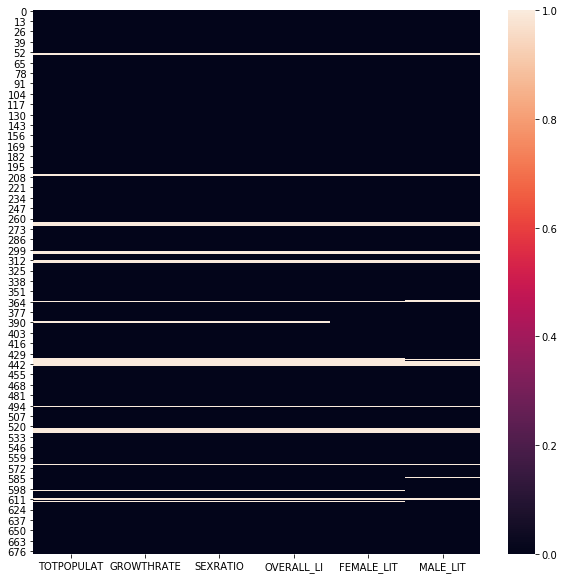

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(data.loc[:,null_cols].isnull())
plt.show()

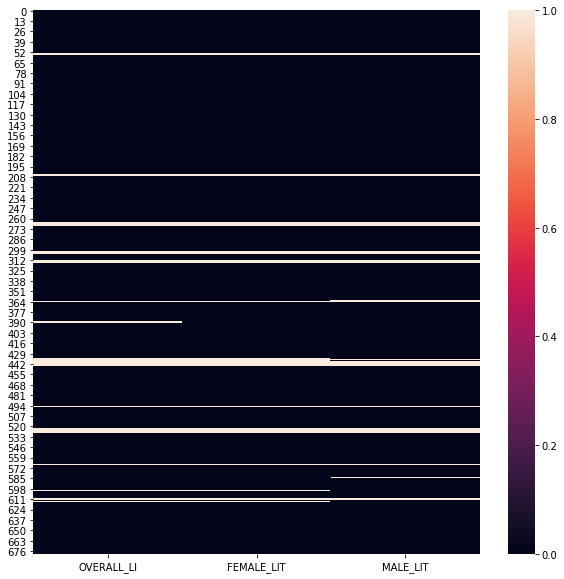

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data.loc[:,'OVERALL_LI':'MALE_LIT'].isnull())
plt.show()

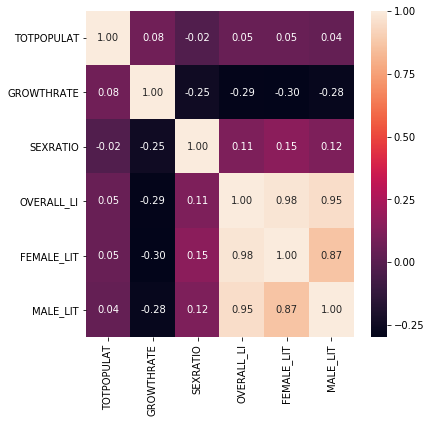

In [37]:
plt.figure(figsize=(6,6))
sns.heatmap(data.loc[:,'TOTPOPULAT':'MALE_LIT'].corr(),annot=True,fmt='.2f')
plt.show()

In [38]:
data.loc[null_rows,null_cols]

,TOTPOPULAT,GROWTHRATE,SEXRATIO,OVERALL_LI,FEMALE_LIT,MALE_LIT
54,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
len(null_rows)

49

In [40]:
data.dropna(inplace=True)

In [41]:
data.shape

(631, 58)

In [42]:
data.isnull().sum()

STATCD         0
DISTCD         0
STATNAME       0
DISTNAME       0
DISTRICTS      0
TOTPOPULAT     0
GROWTHRATE     0
SEXRATIO       0
OVERALL_LI     0
FEMALE_LIT     0
MALE_LIT       0
SCHTOTG        0
SCHTOTP        0
SCHTOTGR       0
SCHTOTGA       0
SCHTOTPR       0
SCHBOYTOT      0
SCHGIRTOT      0
ENRTOTG        0
ENRTOTP        0
ENRTOTGR       0
ENRTOTPR       0
TCHTOTG        0
TCHTOTP        0
SPLAYTOT       0
SGTOILTOT      0
SBTOILTOT      0
SWATTOT        0
SELETOT        0
SCOMPTOT       0
SRAMTOT        0
SRAMNTOT       0
MDMTOT         0
SMCTOT         0
CLSTOT         0
TCHTOT         0
ENRGTOT        0
TLME           0
TLMR           0
CONTIE         0
CONTIR         0
PPTR30         0
UPTR35         0
PSCR30         0
USCR35         0
TOTCLGDTOT     0
TOTCLMITOT     0
TOTCLMJTOT     0
TLM_TOT        0
CONTI_TOT      0
TOTCLSTOT      0
PROJTOT        0
PPTCH_TOT      0
PTCH_TOT       0
PGTCHPQ_TOT    0
GTCH_TOT       0
TXT_ALL        0
UNI_ALL        0
dtype: int64

In [43]:
data.head()

,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,TOTPOPULAT,GROWTHRATE,SEXRATIO,OVERALL_LI,FEMALE_LIT,MALE_LIT,SCHTOTG,SCHTOTP,SCHTOTGR,SCHTOTGA,SCHTOTPR,SCHBOYTOT,SCHGIRTOT,ENRTOTG,ENRTOTP,ENRTOTGR,ENRTOTPR,TCHTOTG,TCHTOTP,SPLAYTOT,SGTOILTOT,SBTOILTOT,SWATTOT,SELETOT,SCOMPTOT,SRAMTOT,SRAMNTOT,MDMTOT,SMCTOT,CLSTOT,TCHTOT,ENRGTOT,TLME,TLMR,CONTIE,CONTIR,PPTR30,UPTR35,PSCR30,USCR35,TOTCLGDTOT,TOTCLMITOT,TOTCLMJTOT,TLM_TOT,CONTI_TOT,TOTCLSTOT,PROJTOT,PPTCH_TOT,PTCH_TOT,PGTCHPQ_TOT,GTCH_TOT,TXT_ALL,UNI_ALL
0,1,101,JAMMU & KASHMIR,KUPWARA,1,875564.0,34.62,843.0,66.92,54.79,77.10,1792,284,1749,1792,254,2048,2064,86180,41378,84578,33625,7362,2395,424,1897,1686,1678,189,173,578,674,1781,1792,10007,9757,62643,78851,80093,1271313,1413311,86,4,92,33,6686,2518,803,65,707,10007,208373.0,656,2395,3519,7362,86549,68271
1,1,102,JAMMU & KASHMIR,BARAMULA,1,1015503.0,20.34,873.0,66.93,55.01,77.35,1929,381,1796,1929,320,2276,2296,89329,93778,84579,75259,8476,4232,761,2296,2276,2109,818,269,282,386,1912,1927,12245,12708,90787,541226,550426,1422240,1494052,122,2,222,98,8520,2670,1055,260,431,12245,188826.0,3329,4232,6156,8476,79375,55468
2,1,103,JAMMU & KASHMIR,SRINAGAR,1,1269751.0,23.56,879.0,71.21,63.47,77.95,489,496,30,489,19,969,968,17674,101784,1419,2282,3090,7444,607,843,917,970,605,498,58,221,489,489,7911,10534,58112,122700,127800,1090880,1467209,14,0,81,36,7304,549,58,57,329,7911,175957.0,2791,7444,2344,3090,19994,20730
3,1,104,JAMMU & KASHMIR,BADGAM,1,735753.0,21.18,883.0,57.98,46.60,68.56,1229,237,1194,1229,222,1448,1459,57684,37781,55355,32869,5526,2780,490,1459,1448,1468,250,215,259,447,1226,1229,7659,8316,46780,600345,604450,1364855,1383135,41,1,62,20,5862,1250,547,301,330,7659,177315.0,1296,2780,3824,5526,55502,39852
4,1,105,JAMMU & KASHMIR,PULWAMA,1,570060.0,29.18,913.0,65.00,53.81,75.41,812,216,764,812,163,1008,1020,28026,33319,26766,21242,3638,2541,367,889,835,989,225,196,150,313,807,812,5805,6179,30150,266871,276321,615669,648731,15,1,17,8,4306,1063,436,27,167,5805,94659.0,1290,2541,2585,3638,29561,24068


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 679
Data columns (total 58 columns):
STATCD         631 non-null int64
DISTCD         631 non-null int64
STATNAME       631 non-null object
DISTNAME       631 non-null object
DISTRICTS      631 non-null int64
TOTPOPULAT     631 non-null float64
GROWTHRATE     631 non-null float64
SEXRATIO       631 non-null float64
OVERALL_LI     631 non-null float64
FEMALE_LIT     631 non-null float64
MALE_LIT       631 non-null float64
SCHTOTG        631 non-null int64
SCHTOTP        631 non-null int64
SCHTOTGR       631 non-null int64
SCHTOTGA       631 non-null int64
SCHTOTPR       631 non-null int64
SCHBOYTOT      631 non-null int64
SCHGIRTOT      631 non-null int64
ENRTOTG        631 non-null int64
ENRTOTP        631 non-null int64
ENRTOTGR       631 non-null int64
ENRTOTPR       631 non-null int64
TCHTOTG        631 non-null int64
TCHTOTP        631 non-null int64
SPLAYTOT       631 non-null int64
SGTOILTOT      631 non-null int

In [45]:
data.describe()

,STATCD,DISTCD,DISTRICTS,TOTPOPULAT,GROWTHRATE,SEXRATIO,OVERALL_LI,FEMALE_LIT,MALE_LIT,SCHTOTG,SCHTOTP,SCHTOTGR,SCHTOTGA,SCHTOTPR,SCHBOYTOT,SCHGIRTOT,ENRTOTG,ENRTOTP,ENRTOTGR,ENRTOTPR,TCHTOTG,TCHTOTP,SPLAYTOT,SGTOILTOT,SBTOILTOT,SWATTOT,SELETOT,SCOMPTOT,SRAMTOT,SRAMNTOT,MDMTOT,SMCTOT,CLSTOT,TCHTOT,ENRGTOT,TLME,TLMR,CONTIE,CONTIR,PPTR30,UPTR35,PSCR30,USCR35,TOTCLGDTOT,TOTCLMITOT,TOTCLMJTOT,TLM_TOT,CONTI_TOT,TOTCLSTOT,PROJTOT,PPTCH_TOT,PTCH_TOT,PGTCHPQ_TOT,GTCH_TOT,TXT_ALL,UNI_ALL
count,631.000000,631.000000,631.0,6.310000e+02,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02,631.000000,6.310000e+02,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02,6.310000e+02,6.310000e+02,6.310000e+02,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02,631.000000,631.000000,631.000000,631.000000,6.310000e+02,631.000000
mean,17.118859,1727.984152,1.0,1.887984e+06,17.596609,942.689382,73.364437,64.573788,81.634469,1630.438986,507.635499,1511.129952,1731.614897,321.687797,2151.863708,2173.721078,1.780593e+05,113208.041204,1.565772e+05,61367.443740,7099.424723,4829.052298,1330.175911,2120.234548,2089.011094,2125.554675,1252.253566,569.884311,679.142631,822.988906,1690.340729,1628.833597,11211.419968,12288.167987,144735.762282,2.706113e+05,2.966713e+05,1.006064e+07,1.070584e+07,481.958796,125.248811,475.816165,259.697306,9180.545166,1150.526149,884.597464,65.966719,1411.217116,11211.419968,3.069701e+05,3759.142631,4783.451664,5979.500792,7095.394612,1.894223e+05,133703.301109
std,9.618277,960.877294,0.0,1.519319e+06,11.307395,62.543333,10.088415,12.482755,8.532949,1122.649158,513.155996,1070.730115,1146.316857,330.932942,1415.181233,1433.139934,1.728371e+05,132670.480943,1.614574e+05,74322.485187,5081.223227,4943.088288,982.406866,1413.345503,1392.568059,1416.756165,1119.717930,576.527388,620.269886,715.161199,1123.765038,1023.272593,7411.708202,8391.108541,117154.708466,6.111421e+05,6.802090e+05,1.009919e+07,1.149707e+07,565.935866,145.595482,472.872456,235.513587,6492.981362,859.467651,878.284867,138.385029,985.751612,7411.708202,2.476100e+05,4841.388149,4976.297740,3975.001612,5079.905958,1.722280e+05,148198.716690
min,1.000000,101.000000,1.0,7.948000e+03,-58.390000,533.000000,37.220000,30.970000,43.600000,14.000000,0.000000,0.000000,17.000000,0.000000,30.000000,30.000000,1.098000e+03,0.000000,0.000000e+00,0.000000,136.000000,0.000000,3.000000,29.000000,30.000000,26.000000,10.000000,8.000000,0.000000,2.000000,16.000000,16.000000,136.000000,151.000000,584.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,77.000000,5.000000,0.000000,0.000000,0.000000,136.000000,0.000000e+00,0.000000,0.000000,68.000000,136.000000,0.000000e+00,0.000000
25%,9.000000,927.500000,1.0,8.231490e+05,12.055000,903.500000,66.465000,55.965000,76.510000,786.000000,149.000000,718.000000,842.000000,89.000000,1061.000000,1077.500000,6.964900e+04,26333.500000,5.518150e+04,14184.000000,3889.000000,1511.000000,613.000000,1054.500000,1035.500000,1082.000000,441.500000,190.000000,221.500000,285.000000,830.000000,810.000000,6069.500000,6639.500000,59508.500000,1.450000e+04,1.900000e+04,4.484218e+06,4.653948e+06,82.000000,21.000000,129.000000,91.000000,4580.000000,530.000000,380.000000,4.000000,719.000000,6069.500000,1.297240e+05,510.500000,1315.000000,3331.000000,3889.000000,7.732350e+04,24097.000000
50%,18.000000,1817.000000,1.0,1.563107e+06,17.050000,946.000000,73.480000,63.720000,82.650000,1509.000000,340.000000,1399.000000,1588.000000,218.000000,1975.000000,1995.000000,1.362540e+05,67329.000000,1.184980e+05,35382.000000,6158.000000,3470.000000,1099.000000,1919.000000,1895.000000,1932.000000,971.000000,392.000000,543.000000,649.000000,1555

In [46]:
data.corr()


,STATCD,DISTCD,DISTRICTS,TOTPOPULAT,GROWTHRATE,SEXRATIO,OVERALL_LI,FEMALE_LIT,MALE_LIT,SCHTOTG,SCHTOTP,SCHTOTGR,SCHTOTGA,SCHTOTPR,SCHBOYTOT,SCHGIRTOT,ENRTOTG,ENRTOTP,ENRTOTGR,ENRTOTPR,TCHTOTG,TCHTOTP,SPLAYTOT,SGTOILTOT,SBTOILTOT,SWATTOT,SELETOT,SCOMPTOT,SRAMTOT,SRAMNTOT,MDMTOT,SMCTOT,CLSTOT,TCHTOT,ENRGTOT,TLME,TLMR,CONTIE,CONTIR,PPTR30,UPTR35,PSCR30,USCR35,TOTCLGDTOT,TOTCLMITOT,TOTCLMJTOT,TLM_TOT,CONTI_TOT,TOTCLSTOT,PROJTOT,PPTCH_TOT,PTCH_TOT,PGTCHPQ_TOT,GTCH_TOT,TXT_ALL,UNI_ALL
STATCD,1.000000,0.999898,NaN,0.178741,-0.183891,0.469672,0.202481,0.241654,0.158329,0.087101,0.064758,0.063742,0.148139,-0.034972,0.084042,0.083497,-0.037375,0.117329,-0.058170,-0.024888,0.081563,0.189237,0.112180,0.088742,0.090084,0.089676,0.271512,0.329838,0.202683,0.209995,0.148304,0.141362,0.101520,0.156212,0.030392,-0.026482,-0.016734,0.150960,0.145663,-0.198571,-0.053074,-0.110194,0.043211,0.100657,-0.008868,0.120534,-0.179991,0.203101,0.101520,0.010808,0.236661,0.194667,0.188134,0.082209,0.098104,0.027577
DISTCD,0.999898,1.000000,NaN,0.181157,-0.183693,0.470334,0.199581,0.238230,0.156458,0.090857,0.067553,0.067748,0.151976,-0.031012,0.087981,0.087431,-0.035244,0.120278,-0.055596,-0.020062,0.082308,0.190390,0.115969,0.092758,0.094119,0.093647,0.271947,0.330114,0.204201,0.211735,0.152142,0.145795,0.104723,0.157323,0.033705,-0.025549,-0.015906,0.152403,0.146914,-0.193280,-0.047295,-0.106766,0.045545,0.103702,-0.004927,0.121188,-0.176500,0.206655,0.104723,0.014165,0.237244,0.195791,0.189240,0.082941,0.100239,0.030085
DISTRICTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTPOPULAT,0.178741,0.181157,NaN,1.000000,0.055728,-0.018994,0.041730,0.038783,0.039312,0.644654,0.634059,0.579098,0.683549,0.490483,0.743840,0.743805,0.694058,0.692134,0.600859,0.526660,0.767654,0.627132,0.689205,0.749972,0.750712,0.759609,0.748359,0.624568,0.576305,0.578159,0.676137,0.606928,0.876443,0.860348,0.903960,0.219989,0.217806,0.544663,0.522323,0.554498,0.559642,0.690467,0.793108,0.859149,0.595948,0.464355,0.178321,0.693773,0.876443,0.925868,0.563624,0.615723,0.757633,0.767409,0.778751,0.618066
GROWTHRATE,-0.183891,-0.183693,NaN,0.055728,1.000000,-0.245076,-0.295885,-0.305781,-0.276267,0.057160,0.027458,0.064827,0.035539,0.009594,0.059938,0.059005,0.181171,0.058238,0.184180,0.034500,0.018347,-0.014239,0.011436,0.048804,0.049343,0.047515,-0.105694,-0.078226,0.002314,0.014189,0.033830,0.060158,0.087770,0.005306,0.166008,0.075983,0.074610,-0.000218,-0.001817,0.261538,0.168939,0.247764,0.192467,0.094566,0.059527,-0.016094,0.069988,0.006145,0.087770,0.178288,-0.050642,-0.019438,-0.018834,0.018210,0.118273,0.085989
SEXRATIO,0.469672,0.470334,NaN,-0.018994,-0.245076,1.000000,0.115968,0.156867,0.115563,0.078047,-0.025605,0.087279,0.114629,0.055209,0.055830,0.055700,-0.075497,-0.074941,-0.048472,0.014301,0.055746,0.010386,-0.016803,0.055813,0.055325,0.050304,0.133021,0.108133,0.047491,0.070848,0.118308,0.113120,-0.006459,0.042298,-0.085820,-0.052344,-0.053038,0.106121,0.093988,-0.161964,-0.135271,-0.137263,-0.093546,-0.037487,0.063512,0.160192,-0.136528,0.156350,-0.006459,-0.099034,0.034907,0.013660,0.096161,0.056229,-0.003097,-0.010155
OVERALL_LI,0.202481,0.199581,NaN,0.041730,-0.295885,0.115968,1.000000,0.975521,0.952656,-0.294559,0.105343,-0.334020,-0.237914,0.015036,-0.200401,-0.200269,-0.289948,0.192229,-0.362639,0.047667,-0.083239,0.284163,-0.019993,-0.186819,-0.184804,-0.182599,0.117902,0.275703,0.010010,-0.038977,-0.237479,-0.289666,-0.055215,0.117073,-0.115553,-0.098509,-0.094361,-0.120824,-0.105604,-0.401994,-0.238241,-0.321282,-0.183769,-0.025918,-0.188053,-0.090295,-0.101000,-0.187951,-0.055215,-0.152097,0.309487,0.290466,-0.039531,-0.082991,-0.192424,-0.227282
FEMALE_LIT,0.241654,0.238230,NaN,0.038783,-0.305781,0.156867,0.975521,1.000000,0.865205,-0.315787,0.071823,-0.359426,-0.255864,-0.0260

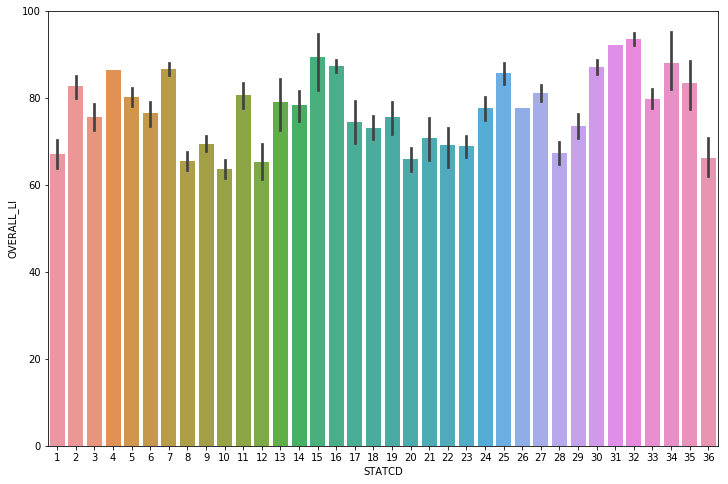

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x='STATCD',y='OVERALL_LI',data=data)

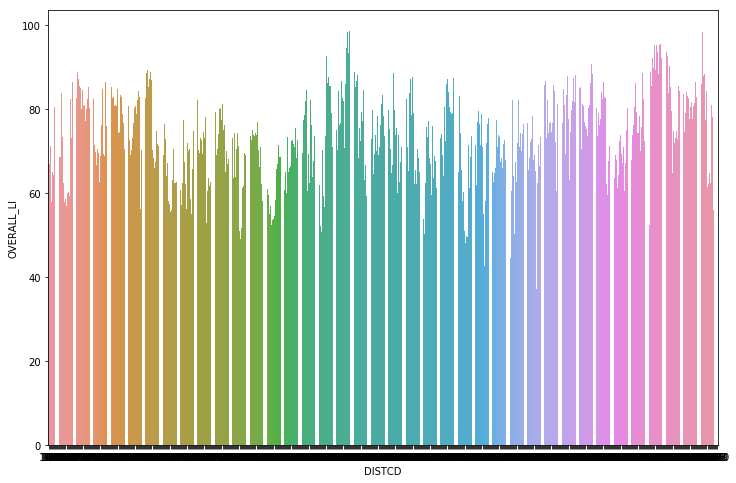

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(x='DISTCD',y='OVERALL_LI',data=data)

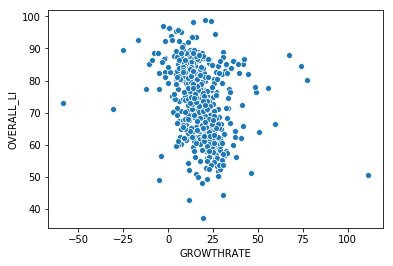

In [49]:
sns.scatterplot(x='GROWTHRATE',y='OVERALL_LI',data=data,palette='rainbow')

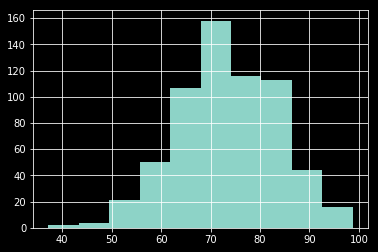

In [50]:

plt.style.use('dark_background')
data['OVERALL_LI'].hist()

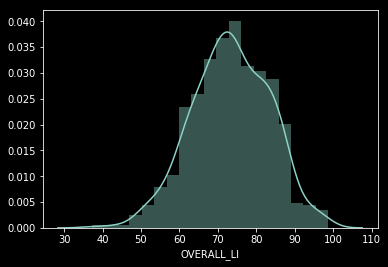

In [51]:
sns.distplot(data['OVERALL_LI'])

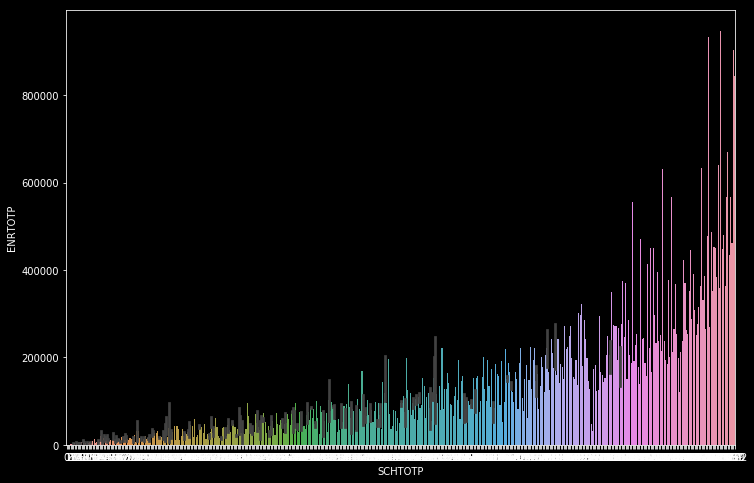

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x='SCHTOTP',y='ENRTOTP',data=data)

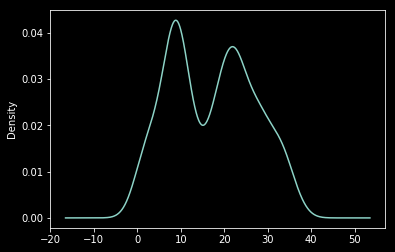

In [53]:
data['STATCD'].plot.kde()

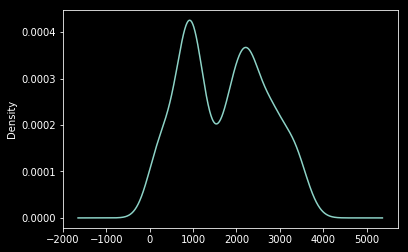

In [54]:
data['DISTCD'].plot.kde()

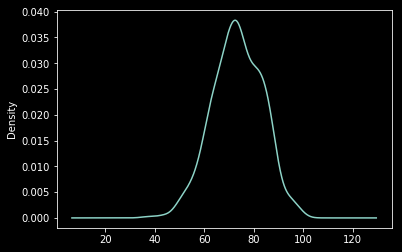

In [55]:
data['OVERALL_LI'].plot.kde()

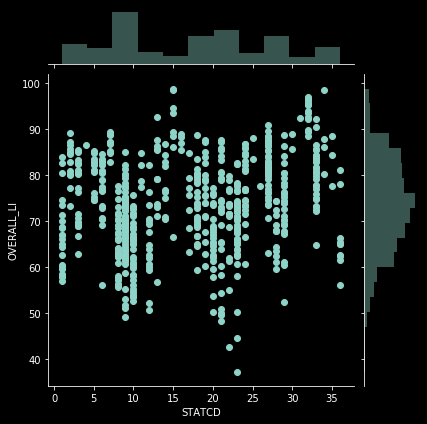

In [56]:
sns.jointplot(x='STATCD',y='OVERALL_LI',data=data)

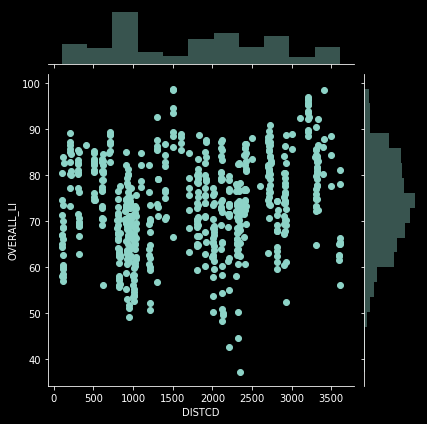

In [59]:
sns.jointplot(x='DISTCD',y='OVERALL_LI',data=data)

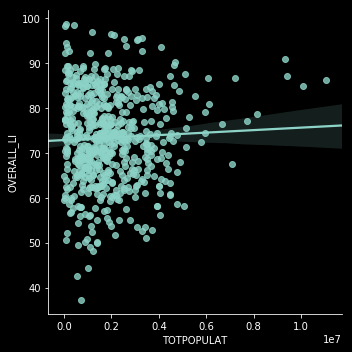

In [61]:
sns.lmplot(x='TOTPOPULAT',y='OVERALL_LI',data=data)